## Importing the necessary Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Customer Data

In [2]:
data = pd.read_csv("Customers Data.csv")

In [3]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.describe().T


,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [5]:
# Checking the null values and the column data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## Normalising the Numerical Features

In [6]:
data['Annual Income (k$)'] = (data['Annual Income (k$)'] - data['Annual Income (k$)'].min()) / (data['Annual Income (k$)'].max() - data['Annual Income (k$)'].min())
data['Spending Score (1-100)'] = (data['Spending Score (1-100)'] - data['Spending Score (1-100)'].min()) / (data['Spending Score (1-100)'].max() - data['Spending Score (1-100)'].min())

In [7]:
X=data.iloc[:,[3,4]]

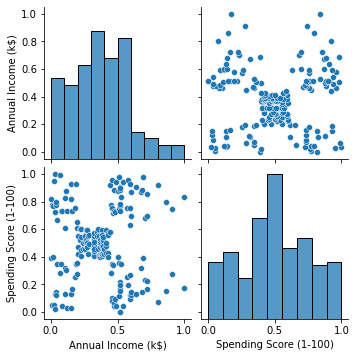

In [8]:
sns.pairplot(X)

## Elbow Method

In [9]:
from sklearn.cluster import KMeans


wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

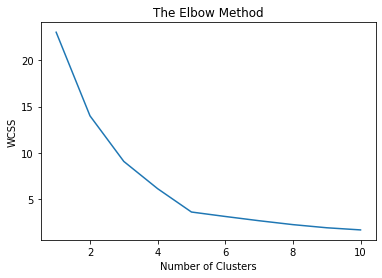

In [10]:
#Elbow Plot

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

## Model - KMeans

In [11]:
#k=5 ( From the Elbow Graph)

#Initializing the model
model = KMeans(n_clusters=5,init='k-means++',random_state=0)

# Fitting the model
y_kmeans = model.fit_predict(X)

In [12]:
#Visualize the clusters

data['clusters'] = y_kmeans

In [13]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),clusters
0,1,Male,19,0.000000,0.387755,4
1,2,Male,21,0.000000,0.816327,1
2,3,Female,20,0.008197,0.051020,4
3,4,Female,23,0.008197,0.775510,1
4,5,Female,31,0.016393,0.397959,4


##  Visualising the Clusters

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

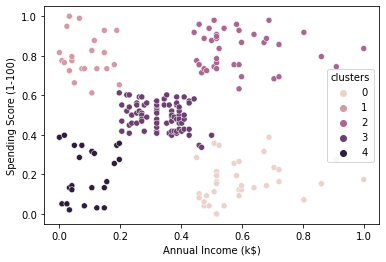

In [14]:
sns.scatterplot(data=data,x='Annual Income (k$)',y='Spending Score (1-100)',hue='clusters')